In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier  

from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from scipy.stats import zscore

from sklearn import metrics
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

from IPython.display import Image
from sklearn import tree
from os import system

In [2]:
wine_df = pd.read_csv('wine.xls', names = ['Class','Alcohol', 'Malic_Acid','Ash','AlcaofAsh', 'Mg','Tot_phenol','Flavanoid','NonFlaPh','Proanthocyanins','Color_Intensity','Hue','OD280/OD315 of diluted wines','Proline'])

In [3]:
wine_df.head()

,Class,Alcohol,Malic_Acid,Ash,AlcaofAsh,Mg,Tot_phenol,Flavanoid,NonFlaPh,Proanthocyanins,Color_Intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
wine_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Class,178.0,1.938202,0.775035,1.00,1.0000,2.000,3.0000,3.00
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic_Acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
AlcaofAsh,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Mg,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Tot_phenol,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoid,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
NonFlaPh,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58


In [5]:
wine_df.shape

(178, 14)

In [6]:
wine_df.columns

Index(['Class', 'Alcohol', 'Malic_Acid', 'Ash', 'AlcaofAsh', 'Mg',
       'Tot_phenol', 'Flavanoid', 'NonFlaPh', 'Proanthocyanins',
       'Color_Intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline'],
      dtype='object')

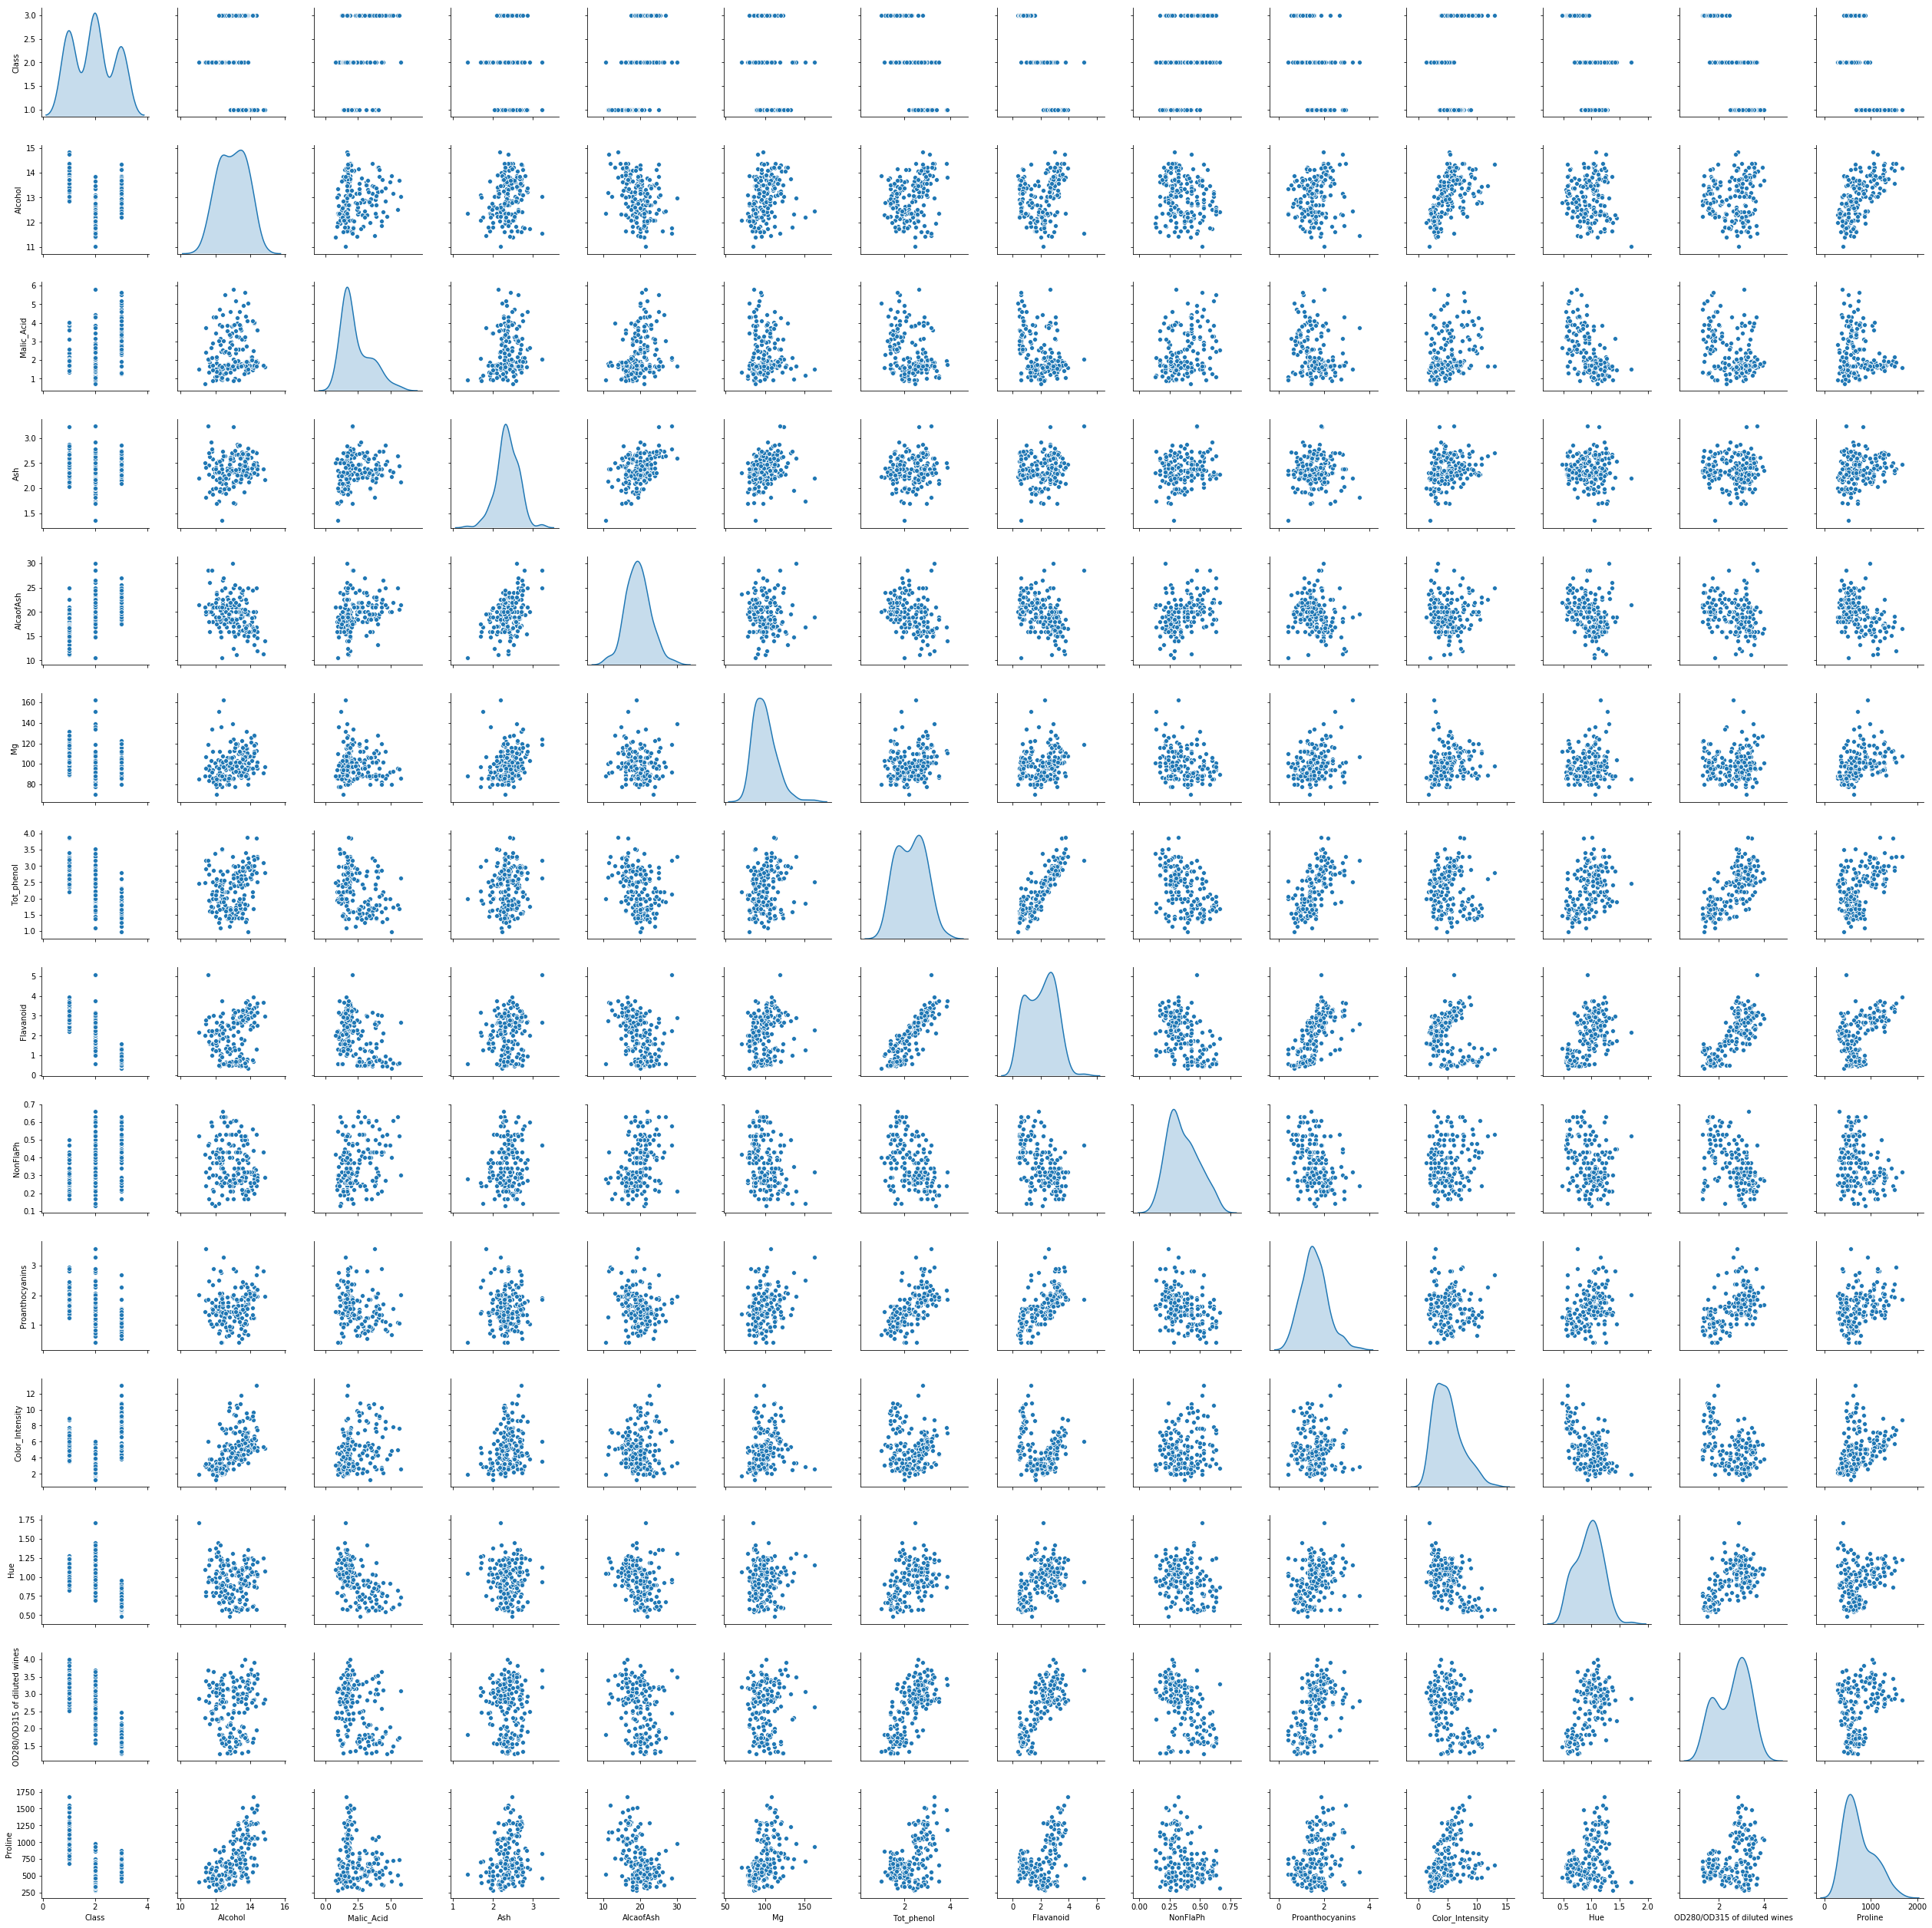

In [7]:
sns.pairplot(wine_df, diag_kind='kde')
plt.show()

In [24]:
x= wine_df.drop('Class', axis=1)
y= wine_df.Class
x_std = StandardScaler().fit_transform(x)

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x_std,y, test_size = 0.3, random_state=2)

In [26]:
x_std

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [27]:
x_train.shape

(124, 13)

In [28]:
x_test.shape

(54, 13)

In [57]:
dt_model = DecisionTreeClassifier(criterion= 'entropy', random_state=0, max_depth=3)

In [58]:
rf_model = RandomForestClassifier(n_estimators= 50, criterion='entropy', max_depth=3, random_state=0)

In [31]:
rf_model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [32]:
dt_model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [33]:
rf_ypred=rf_model.predict(x_test)
dt_ypred=dt_model.predict(x_test)

In [34]:
print(metrics.accuracy_score(y_test,rf_ypred),'\n\n')
print(metrics.confusion_matrix(y_test,rf_ypred),'\n\n')
print(print(metrics.classification_report(y_test,rf_ypred)))

1.0 


[[20  0  0]
 [ 0 20  0]
 [ 0  0 14]] 


             precision    recall  f1-score   support

          1       1.00      1.00      1.00        20
          2       1.00      1.00      1.00        20
          3       1.00      1.00      1.00        14

avg / total       1.00      1.00      1.00        54

None


In [35]:
print(metrics.accuracy_score(y_test,dt_ypred),'\n\n')
print(metrics.confusion_matrix(y_test,dt_ypred),'\n\n')
print(print(metrics.classification_report(y_test,dt_ypred)))

0.8703703703703703 


[[19  1  0]
 [ 2 18  0]
 [ 0  4 10]] 


             precision    recall  f1-score   support

          1       0.90      0.95      0.93        20
          2       0.78      0.90      0.84        20
          3       1.00      0.71      0.83        14

avg / total       0.88      0.87      0.87        54

None


In [37]:
pd.DataFrame(rf_model.feature_importances_, index= x.columns, columns=['Imp'])

,Imp
Alcohol,0.100384
Malic_Acid,0.037794
Ash,0.010626
AlcaofAsh,0.031986
Mg,0.055316
Tot_phenol,0.061453
Flavanoid,0.185825
NonFlaPh,0.003676
Proanthocyanins,0.046697
Color_Intensity,0.129557


In [47]:
models=[]
models.append(('DecisionTree',dt_model))
models.append(('RandomForest',rf_model))
models

[('DecisionTree',
  DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, presort=False, random_state=0,
              splitter='best')),
 ('RandomForest',
  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
              max_depth=3, max_features='auto', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
              oob_score=False, random_state=None, verbose=0,
              warm_start=False))]

In [84]:
results= []
names= []
scoring= 'accuracy'

for name,model in models:
    kfold= model_selection.KFold(n_splits = 5, random_state=2)
    cv_results = model_selection.cross_val_score(model, x_std, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" %(name,cv_results.mean(),cv_results.std())
    print(msg)

DecisionTree: 0.881905 (0.048117)
RandomForest: 0.944286 (0.039173)


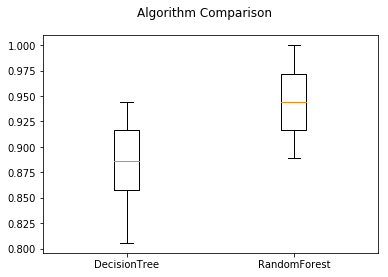

In [85]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax= fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [81]:
results

[array([0.91666667, 0.94444444, 0.80555556, 0.88571429, 0.85714286]),
 array([0.88888889, 0.86111111, 0.91666667, 0.94285714, 0.91428571])]

In [87]:
results[0].max()

0.9444444444444444